In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, sys, lzma, os
sys.path.insert(0,'C:/git/StrathLab/libs') #Lab PC
sys.path.insert(0,'D:/Repositories/StrathLab/libs') #XMG
import StrathLabToolkit as lab

datadir = 'data'

datadir_full = os.path.join(os.getcwd(),datadir)
datafiles = lab.Get_Files_From_Dir(datadir_full)
datafiles = [entry for entry in datafiles if '.pkl.lz' in entry] 
dfile_count=len(datafiles)
print(f'Found {dfile_count} datafiles in: {datadir_full}')

Found 1 datafiles in: D:\Repositories\StrathLab\jupyter_acquisition_template\data


File loaded: 2023-03-13__203_Cancellation_AB-MOD.pkl.lz
- includes: 1x OSC channel(s), 10x repeated acquisition


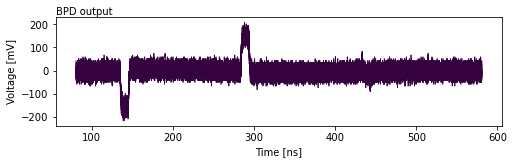

In [19]:
## Load and plot a datafile
lookup = '0' # performs lookup via this string in datafiles
 
for dfile in datafiles:
    if lookup in dfile:
        with lzma.open((os.path.join(datadir_full,dfile)),"rb") as f:
            data = pickle.load(f)
            print(f'File loaded: {dfile}')
            print(f'- includes: {data.readout_osc_count}x OSC channel(s), {data.repeats}x repeated acquisition')
            
            if data.readout_osc_count == 1:   # Files with only one recorded OSC trace
                
                fig, ax = plt.subplots(data.readout_osc_count,1,
                                       figsize=(8,2))
                for rep in range(data.repeats):      # Acquisition repetitions
                    ax.plot(np.linspace(*data[f'readout_osc_0'].xpar)*1e9,
                            data[f'readout_osc_0'][f'y{rep}']*1e3,
                            lw=0.75,
                            color='xkcd:deep purple')
                    
                ax.text(0,1.02,data[f'readout_osc_0'].description,transform = ax.transAxes)
                ax.set_xlabel('Time [ns]')
                ax.set_ylabel('Voltage [mV]')
            
            else:                             # Files with two or more recorded OSC traces
                fig, ax = plt.subplots(data.readout_osc_count,1,
                                       figsize=(8,2*data.readout_osc_count))
                for ic in range(data.readout_osc_count):
                    for rep in range(data.repeats):  # Acquisition repetitions
                        ax[ic].plot(np.linspace(*data[f'readout_osc_{ic}'].xpar)*1e9,
                                data[f'readout_osc_{ic}'][f'y{rep}']*1e3,
                                lw=0.75,
                                color='xkcd:deep purple')
                        
                    ax[ic].text(0,1.02,data[f'readout_osc_0'].description,transform = ax.transAxes)
                    ax[ic].set_xlabel('Time [ns]')
                    ax[ic].set_ylabel('Voltage [mV]')

In [21]:
# Contents of loaded datafile can easily be visualized using following function:
data.contents()

KEY                       LEVEL           TYPE      
-------------------------------------------------------------------------------
date                      0               <str>: 2023/03/13, 14:09:13
fname                     0               <str>: 203_Cancellation_AB-MOD
modulation                0               <objdict> 
  ch1_offset_A            1               <float>: 1.1e-08
  ch1_pulse_count         1               <int>: 10 
  ch1_pulse_length_sa     1               <int>: 10 
  ch1_pulseamps           1               <tuple>: (1, 0, 1)
  ch1_separator           1               <float>: 5e-07
  ch1_trigseparation      1               <float>: 1.5e-07
  ch1_type                1               <str>: dac
  ch1_voltage             1               <float>: 0.18
  ch1_wfamp               1               <float>: 0.35
  ch2_offset_A            1               <int>: 0  
  ch2_pulse_count         1               <int>: 10 
  ch2_pulse_length_sa     1               <int>: 10 
  ch2